# Projeto: Busca do menor caminho entre dois nós usando algorítimo de Dijkstra

## Lendo a base de dados

In [81]:

from modules import data

data_base = data.read_data('data_base/lastfm_asia_edges.csv')


## Prepearando o grafo

In [82]:
from modules import graph

graph = graph.build(data_base)


## Buscando o menor caminho entre dois nós

#

### Buscando o menor caminho entre dois nós usando Dijkstra

In [84]:
from modules import dijkstra


def print_path_route(start, target, distance, route):
    print(f"Distância mínima de {start} até {target}: {distance}")
    print("Seguindo o caminho:")
    for index in range(len(route)):
        if route[index] != target:
            print(f'-> De {route[index]} para {route[index + 1]}')


node_a = '0'
node_b = '1'

distance, route = dijkstra.dijkstra(graph, node_a, node_b)

print_path_route(node_a, node_b, distance, route)


Distância mínima de 0 até 1: 6
Seguindo o caminho:
-> De 0 para 747
-> De 747 para 2020
-> De 2020 para 6463
-> De 6463 para 1698
-> De 1698 para 4257
-> De 4257 para 1


### Ilustrando o menor caminho

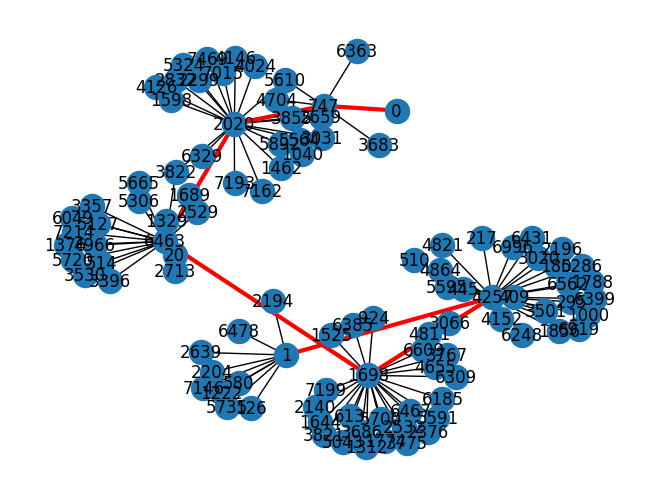

In [85]:
from modules import view

view.show_route(graph, route)
